In [1]:
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt         
import seaborn as sns        

Dataset = pd.read_excel('./Sample - Superstore.xlsx','Orders')
print(Dataset)

      Row ID        Order ID Order Date  Month  Year  Ship Date  \
0          1  CA-2016-152156 2016-11-08     11  2016 2016-11-11   
1          2  CA-2016-152156 2016-11-08     11  2016 2016-11-11   
2          3  CA-2016-138688 2016-06-12      6  2016 2016-06-16   
3          4  US-2015-108966 2015-10-11     10  2015 2015-10-18   
4          5  US-2015-108966 2015-10-11     10  2015 2015-10-18   
...      ...             ...        ...    ...   ...        ...   
9989    9990  CA-2014-110422 2014-01-21      1  2014 2014-01-23   
9990    9991  CA-2017-121258 2017-02-26      2  2017 2017-03-03   
9991    9992  CA-2017-121258 2017-02-26      2  2017 2017-03-03   
9992    9993  CA-2017-121258 2017-02-26      2  2017 2017-03-03   
9993    9994  CA-2017-119914 2017-05-04      5  2017 2017-05-09   

           Ship Mode Customer ID     Customer Name    Segment  ...  \
0       Second Class    CG-12520       Claire Gute   Consumer  ...   
1       Second Class    CG-12520       Claire Gute   Co

In [10]:
#Dataset.sample(num) gives the random num sample like df.sample(5) gives 5 random samples
#Dataset.info()
#Dataset.isnull()
#Dataset.isnull().sum()

type(Dataset)

pandas.core.frame.DataFrame

In [19]:
Dataset.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Month              12
Year                4
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [20]:
print(Dataset.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Month', 'Year', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [30]:
#Remove The Column , axi = 1 - coluum = 1 , row = 0 

Dataset = Dataset.drop(columns = ['Postal Code'] , axis=1)

In [31]:
print(Dataset.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Month', 'Year', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [34]:
# Count the no of orders statewise

State_Wise_Counts = Dataset['State'].value_counts(ascending = True)
print(State_Wise_Counts)

State
Wyoming                    1
West Virginia              4
North Dakota               7
Maine                      8
District of Columbia      10
Vermont                   11
South Dakota              12
Montana                   15
Idaho                     21
Kansas                    24
New Hampshire             27
Iowa                      30
New Mexico                37
Nebraska                  38
Nevada                    39
Louisiana                 42
South Carolina            42
Mississippi               53
Utah                      53
Rhode Island              56
Arkansas                  60
Alabama                   61
Missouri                  66
Oklahoma                  66
Connecticut               82
Minnesota                 89
Delaware                  96
Maryland                 105
Wisconsin                110
Oregon                   124
New Jersey               130
Massachusetts            135
Kentucky                 139
Indiana                  149
Colorado

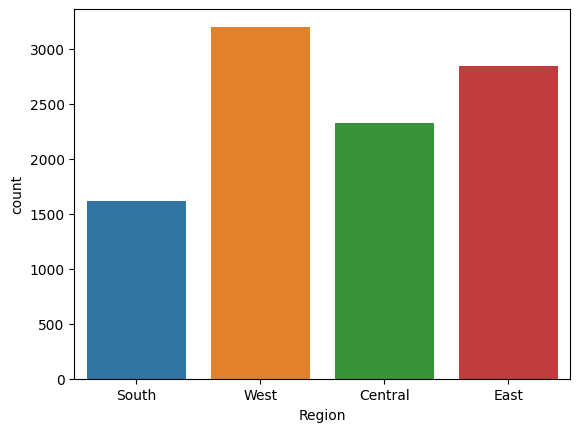

In [36]:
#plot based on count of orders in different Regions

sns.countplot(x= Dataset['Region'] , hue = Dataset['Region'])
plt.show()

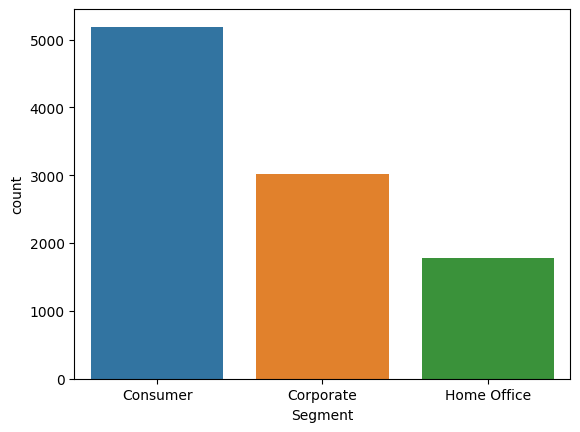

In [37]:
sns.countplot(x=Dataset["Segment"], hue=Dataset["Segment"])
plt.show()

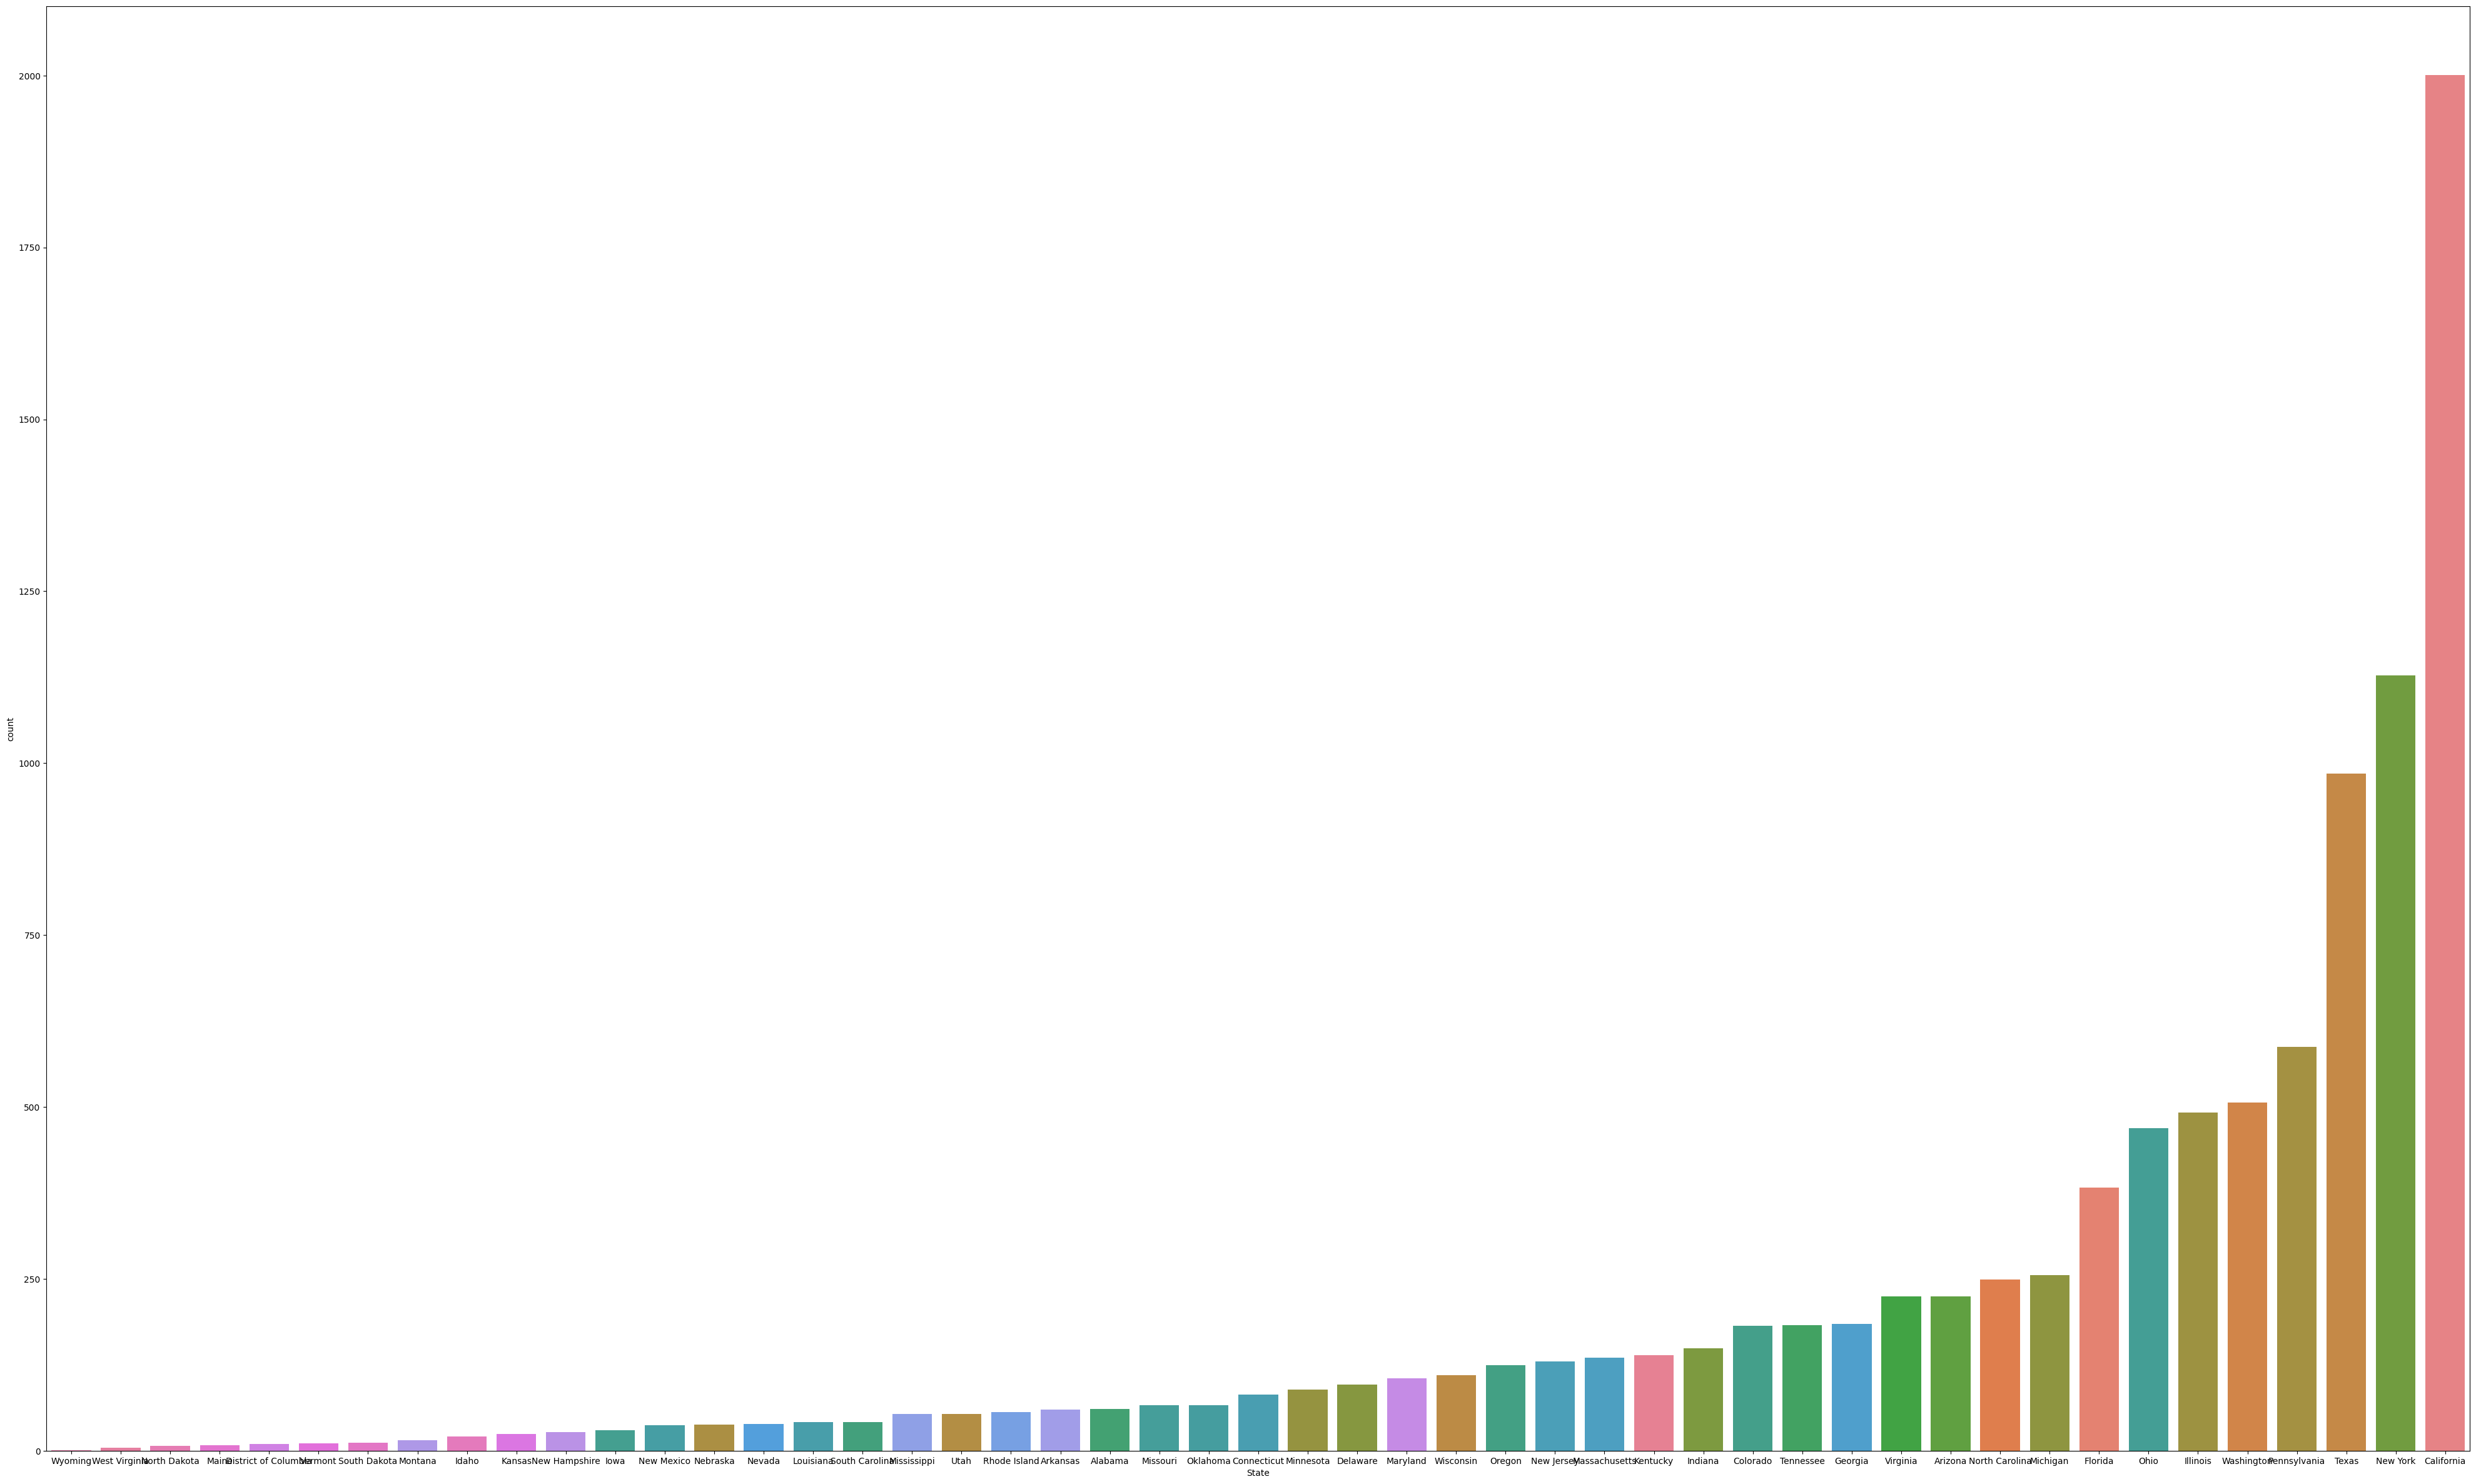

In [3]:
plt.figure(figsize = (50,30))
sns.countplot(x=Dataset["State"], hue=Dataset["State"] , order=Dataset['State'].value_counts(ascending=True).index)
plt.show()

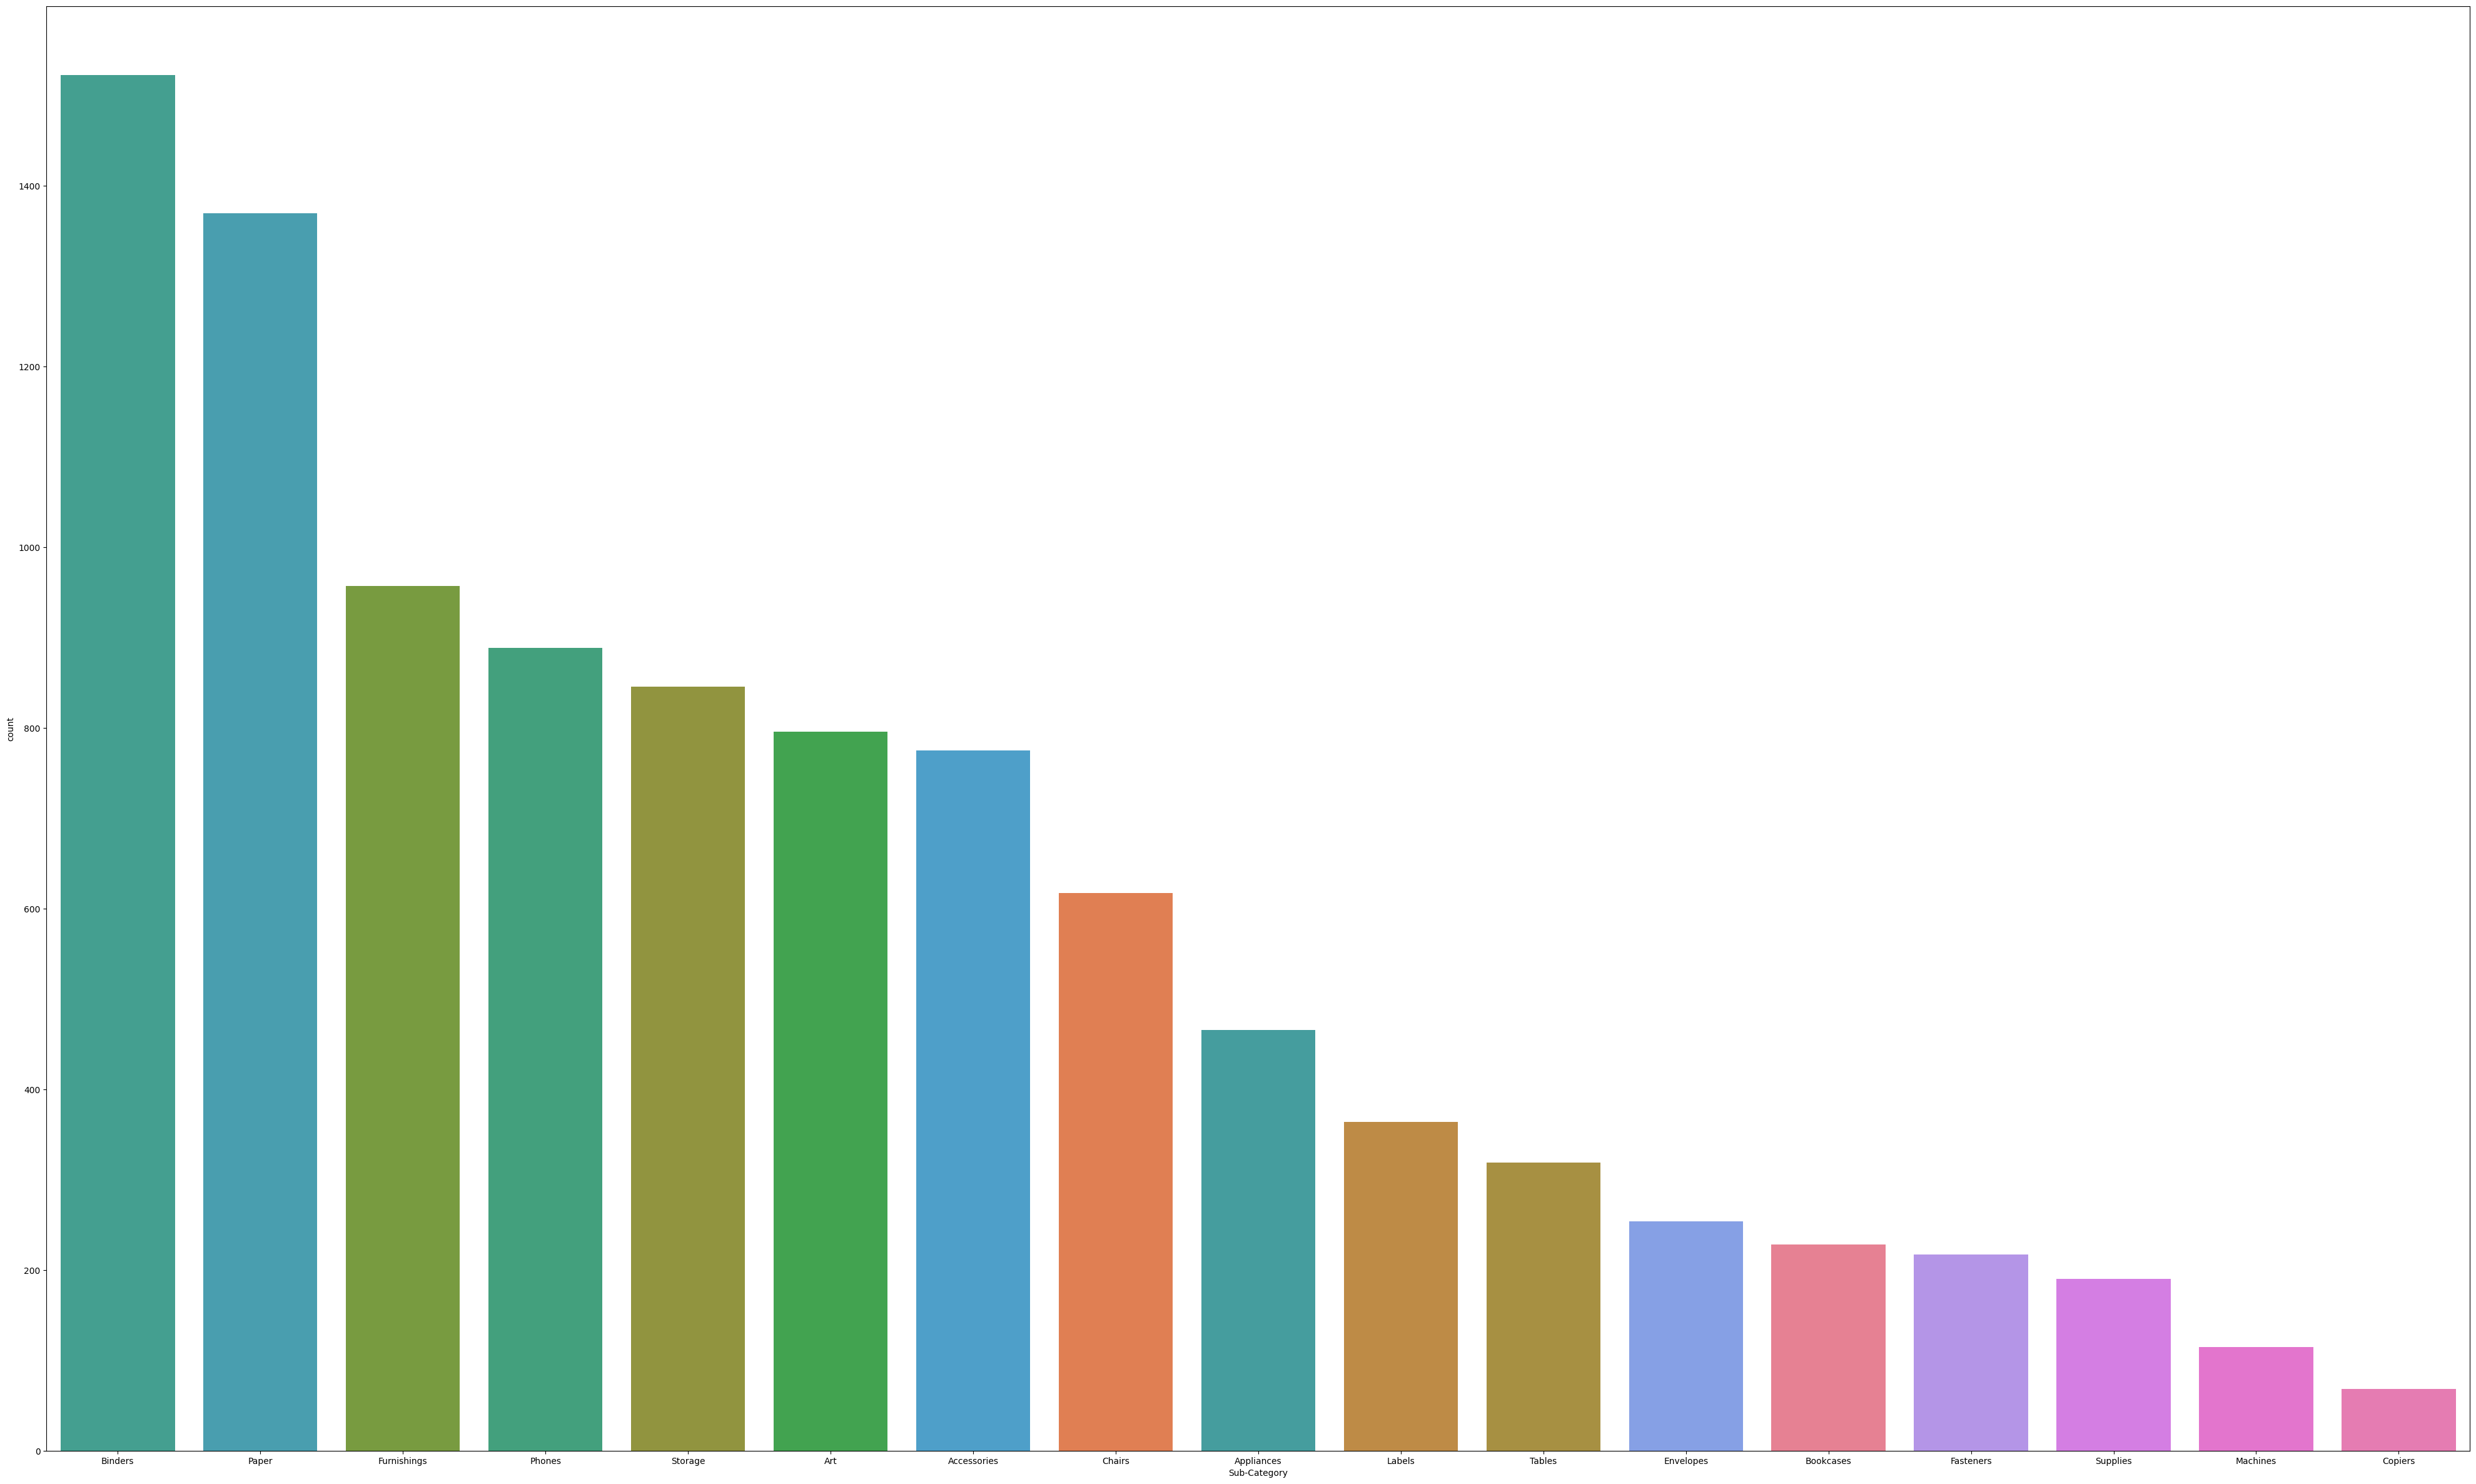

In [4]:
plt.figure(figsize=(50, 30))
sns.countplot(
    data=Dataset, x="Sub-Category", hue="Sub-Category", order=Dataset["Sub-Category"].value_counts().index
)
plt.show()

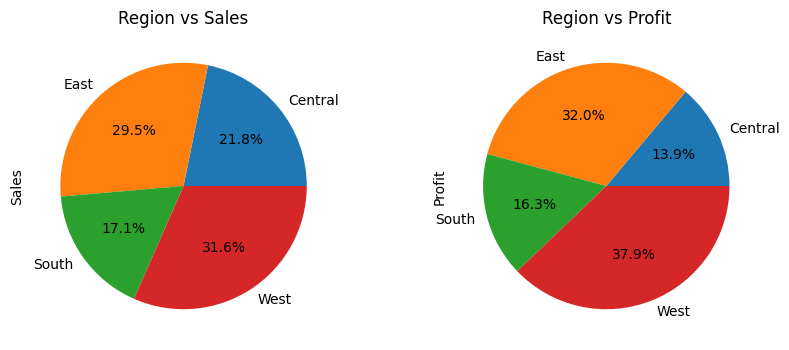

In [9]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
Dataset.groupby("Region")['Sales'].sum().plot.pie(autopct = "%1.01f%%")
plt.title("Region vs Sales")
plt.subplot(1,2,2)
Dataset.groupby("Region")['Profit'].sum().plot.pie(autopct = "%1.01f%%")
plt.title("Region vs Profit")
plt.show()

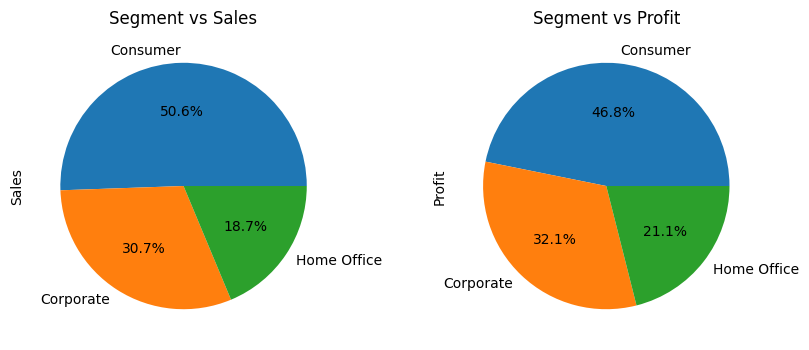

In [10]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
Dataset.groupby("Segment")['Sales'].sum().plot.pie(autopct = "%1.01f%%")
plt.title("Segment vs Sales")
plt.subplot(1,2,2)
Dataset.groupby("Segment")['Profit'].sum().plot.pie(autopct = "%1.01f%%")
plt.title("Segment vs Profit")
plt.show()

<Figure size 1000x400 with 0 Axes>

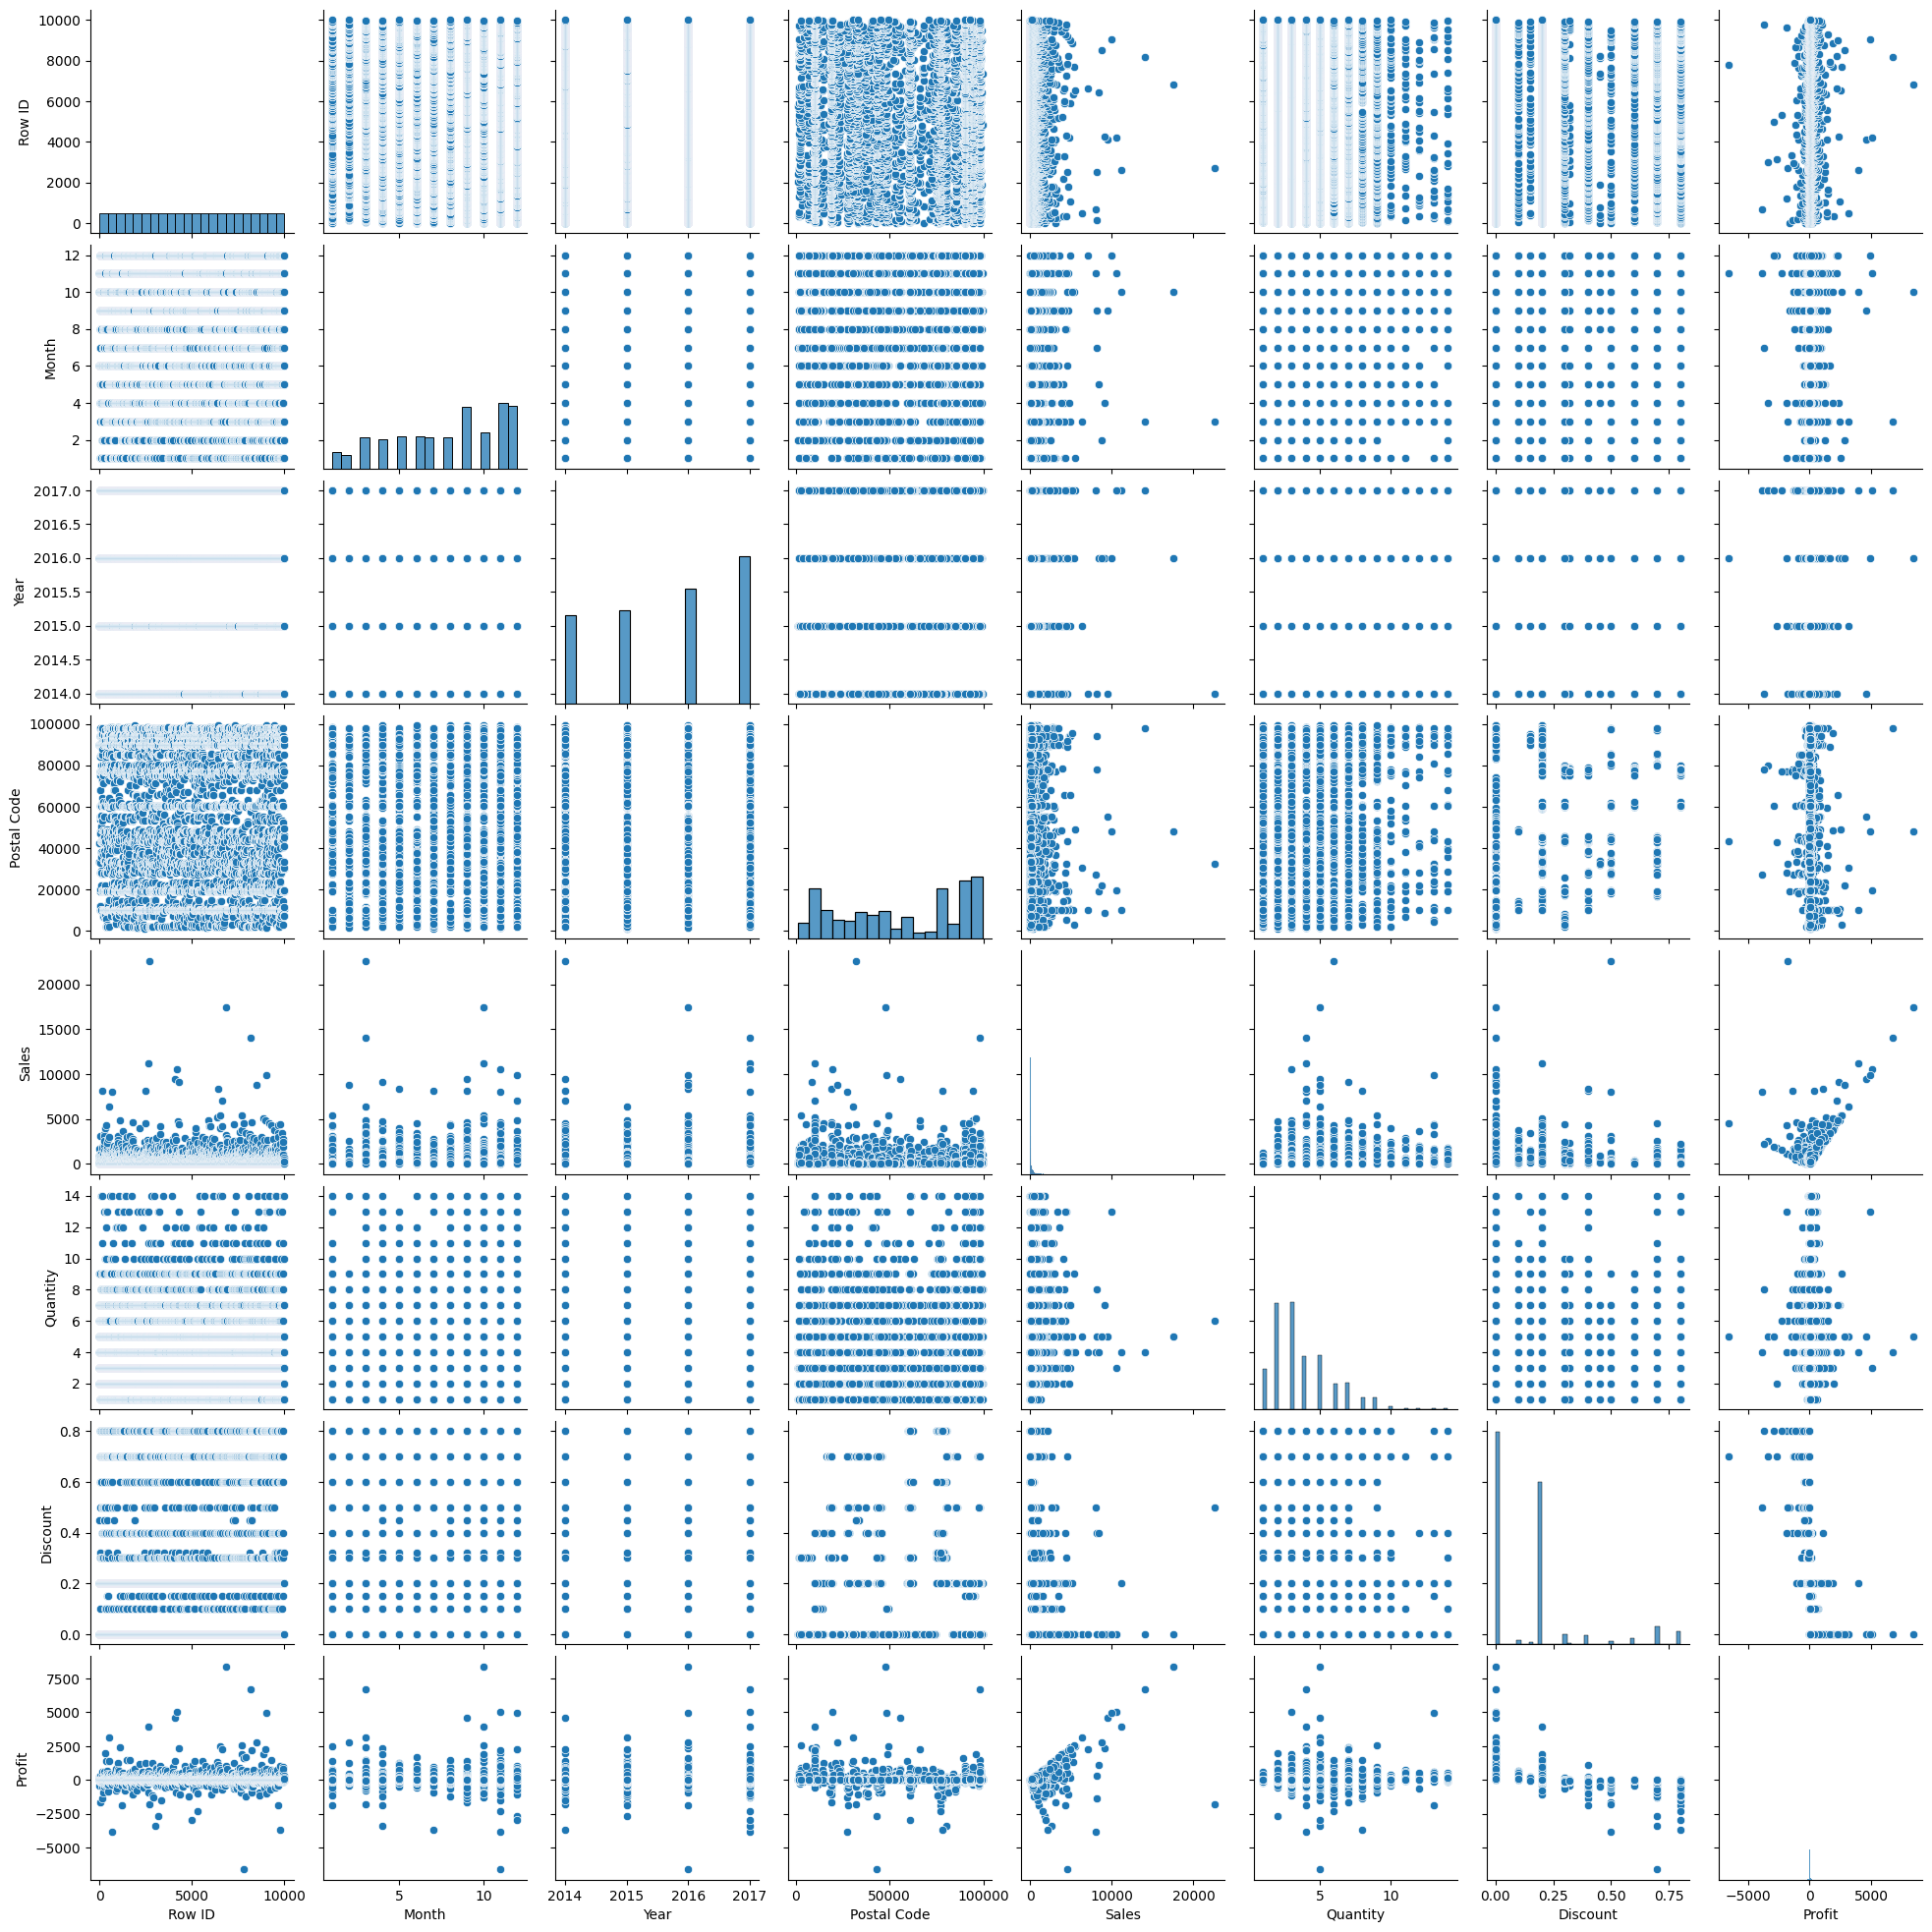

In [11]:
fig = plt.figure(figsize=(10,4))
sns.pairplot(Dataset)
plt.show()

<Axes: >

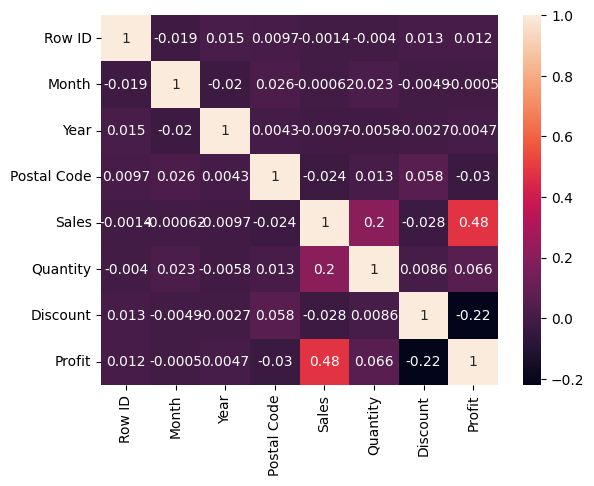

In [2]:
# Dataset = Dataset.drop('Order ID', axis=1)
# Dataset = Dataset.drop('Row ID', axis=1)
# sns.heatmap(Dataset.corr(),annot=True)

non_numeric_columns = Dataset.select_dtypes(exclude=['number']).columns
Dataset_numeric = Dataset.drop(columns=non_numeric_columns)
sns.heatmap(Dataset_numeric.corr(), annot=True)